In [3]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
players <- read_csv("https://raw.githubusercontent.com/dvnguyen09/28_project_planning/refs/heads/main/players.csv")
glimpse(players)
summary(players)

sessions <- read_csv("https://raw.githubusercontent.com/dvnguyen09/28_project_planning/refs/heads/main/sessions.csv")
glimpse(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


# 1) DATA DESCRIPTION

Players: 196 observations, 7 variables.
Sessions: 1535 observations, 5 variables.

1) **Table 1: Players dataset**
|Variable|Type|Meaning|
|----|----|----|
|experience |Character|The experience level of the player|
|subscribe|Logical|If the player is subscribed to game related newsletter or not|
|hashedEmail |Character|Email of user after cryptographic hashing for privacy|
|played_hours |Double| Hours played|
|name|Character|Name of player|
|gender|Character|Gender of player|
|Age|Double|Age of player in years|

Summary Statistics (Mean)
Age: 21.14, 
played_hours: 5.85

Issues: Since the experience and gender variables are categorical, they should be factor type. Age should be an integer type.

2) **Table 2: Sessions dataset (Not used)**
|Variable|Type|Meaning|
|----|----|----|
|hashedEmail|Character|Email of user after cryptographic hashing for privacy|
|start_time|Character|Start time of play session|
|end_time|Character|End time of play session|
|original_start_time|Double|Start time in UNIX time|
|original_end_time|Double|End time in UNIX time|

These datasets were collected by a research group in computer science at UBC. They ran a Minecraft server where players actions were recorded as they played.

# 2) QUESTIONS

broad question:
**What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?**

My specific question:
**Can age and hours played predict if players are subscribed to the newletter in the players dataset?**

We are only looking at age, hours played and subscription, we only use the players dataset.

Since age and hours played are quantitative, they could be plotted in a scatter plot to see the relationship. We can color the different states of subscription, and use classification to predict subscription status based on their age and hours played.

I would wrangle the data to have only the relevant variables (Age, played_hours, and subscribe). I then convert variables to the right type by making Age an integer type. Since the played hours can reach up to 223, played hours has a much larger spread than the age. This data needs to be standardized with scale and center so that variables can contribute equally to the distance.

# 3) EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [5]:
#Load and read dataset

players_data <- read_csv("https://raw.githubusercontent.com/dvnguyen09/28_project_planning/refs/heads/main/players.csv")
glimpse(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


In [6]:
#Minimum Wrangling 

player_wrangled <- select(players_data, Age, played_hours, subscribe)
glimpse(player_wrangled)

Rows: 196
Columns: 3
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…


**There is not much wrangling to do to this data. It is already tidy as each row was a single observation, each column was its own variable, and each cell was a single measurement.**

In [7]:
#Compute mean value for each quantitative variable

mean_table <- player_wrangled |>
summarize(across(Age:played_hours, mean, na.rm = TRUE))
mean_table

Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `across(Age:played_hours, mean, na.rm = TRUE)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


Age,played_hours
<dbl>,<dbl>
21.13918,5.845918


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


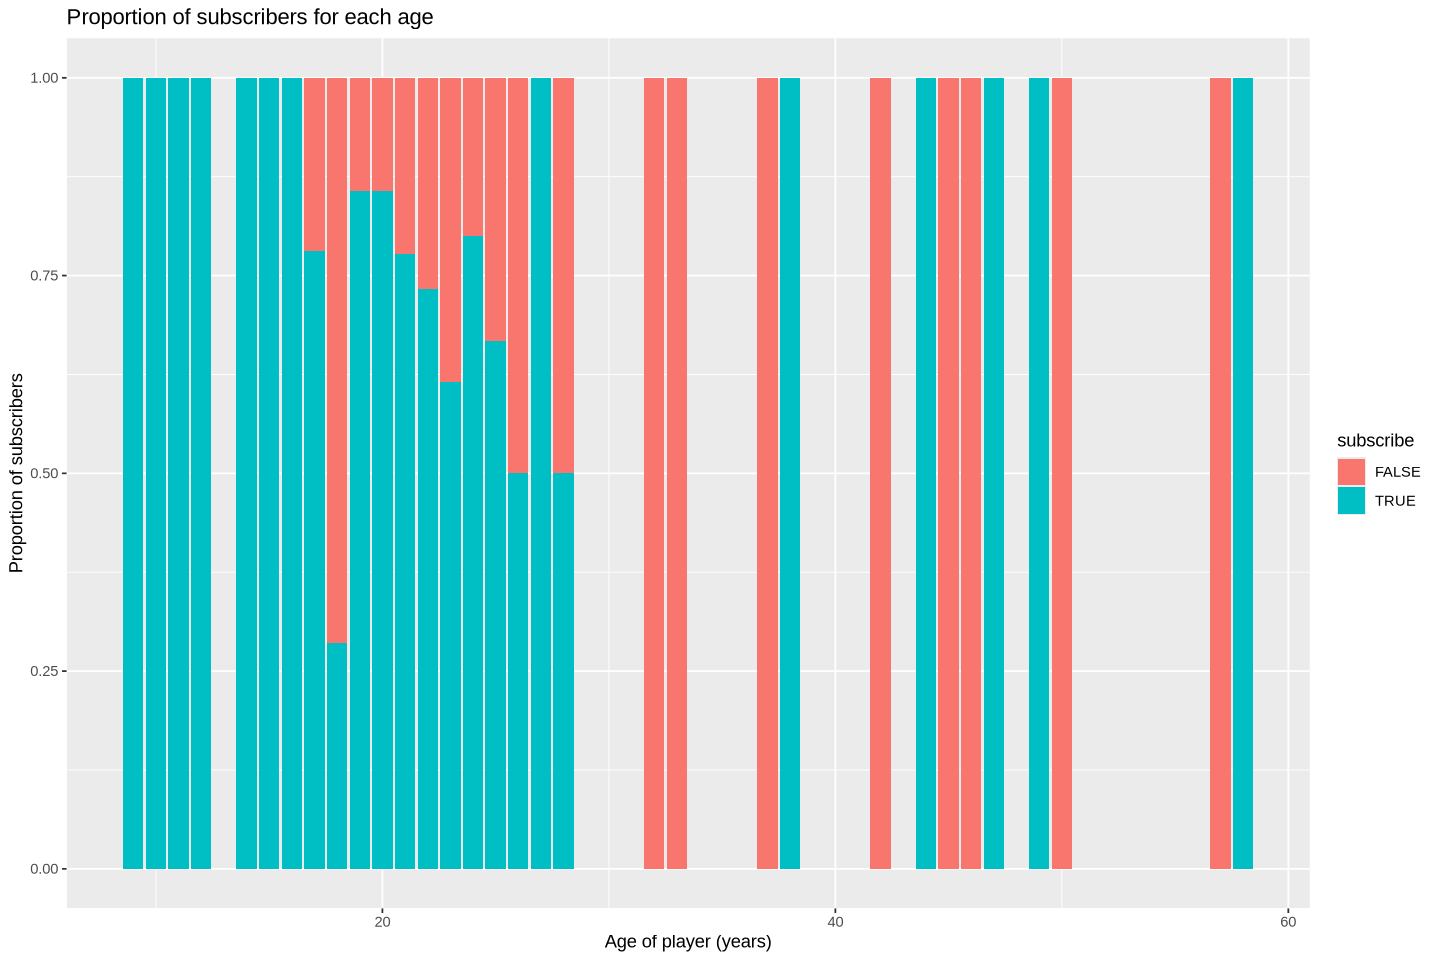

In [8]:
#Visualization 1

options(repr.plot.width = 12, repr.plot.height = 8)
plot_1 <- ggplot(player_wrangled, aes(x= Age, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(x = "Age of player (years)", y = "Proportion of subscribers") +
    ggtitle("Proportion of subscribers for each age")
plot_1

Show the proportion of subscribers for each age. Until players reach age 30, majority are subscribed to game related newsletters. At higher and lower ages, the proportions are 100% because there are less players for those ages. 

No strong relationship between age and subscription. Other variables are better for predicting subscription status.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


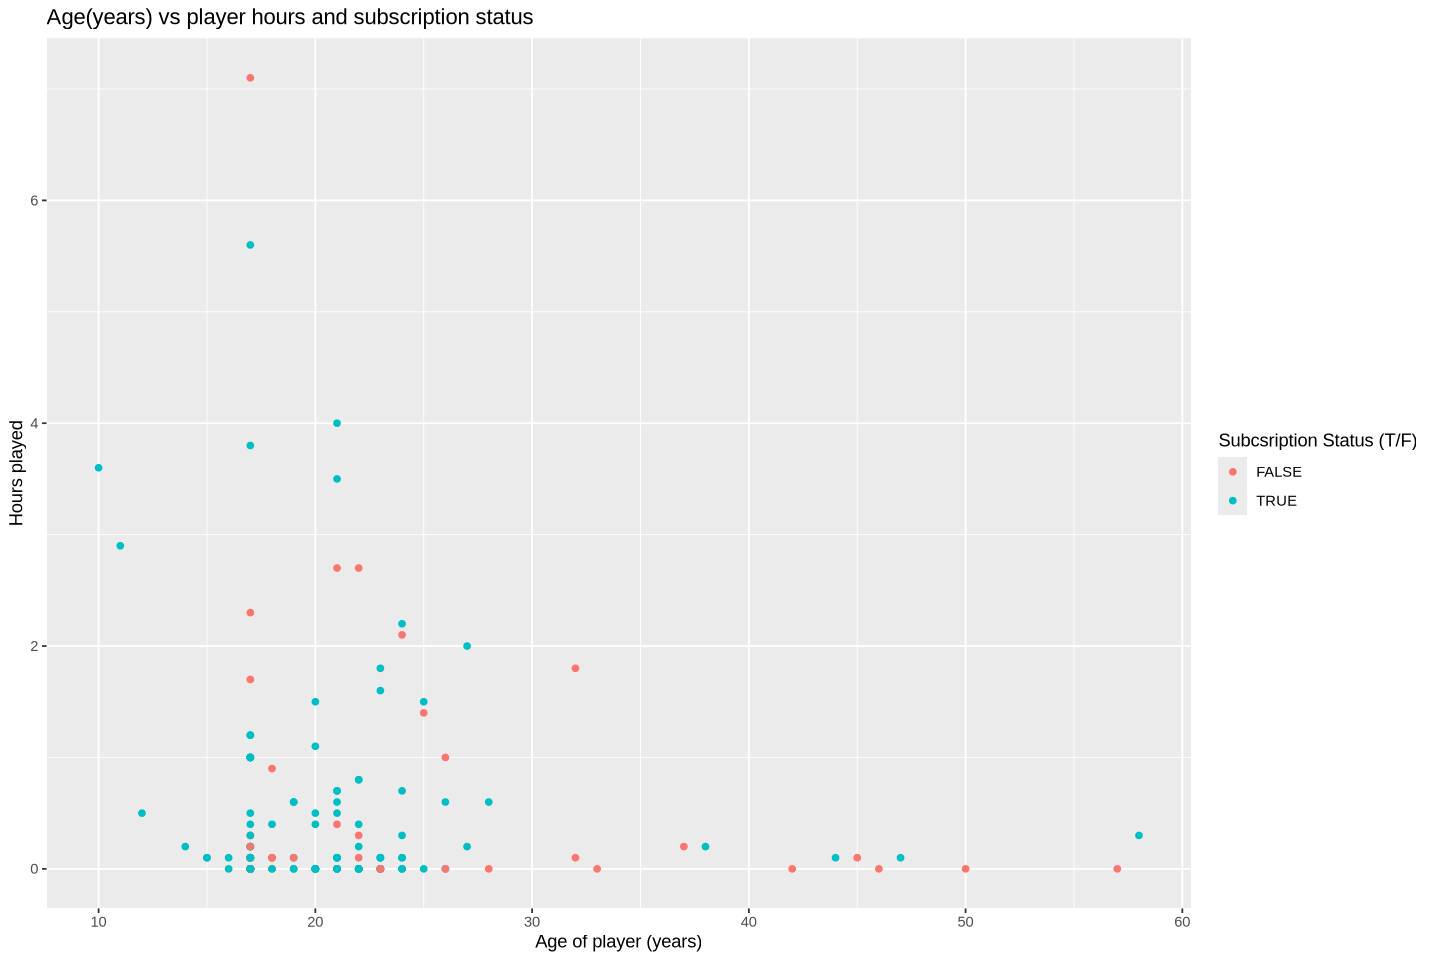

In [9]:
#Visualization 2

player_filter <- filter(player_wrangled, played_hours < 10)

options(repr.plot.width = 12, repr.plot.height = 8)
plot_2 <- ggplot(player_filter, aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(x = "Age of player (years)", y = "Hours played", color = "Subcsription Status (T/F)") +
        ggtitle("Age(years) vs player hours and subscription status")

plot_2
    

Shows us the relationship between age, and hours played and subscription status. I filtered the hours played less than 10 since majority of the user played less than 10. The rest are outliers. 

No strong relationship between subscription and age. When hours played increases, there is more subscriptions. There is a strong positive relationship between hours played and subscription. No clear relationship between age and hours played.

# 4) METHODS AND PLAN

To address my question, classification using KNN will be suitable. 

This is a suitable method for wih my question since I am trying to predict the logical variable (subscribe) based on two predictors (Age and played_hours).

We have to assume that data is standardized. If not, we need to scale and center. 

Since the original players dataset has some outliers in played hours, KNN might be sensitive to this. KNN is hard to interpret and it can be difficult to conclude how you got your answer.

I will standardize the data. Since it is imbalanced, recall and precision are used instead of just accuracy. I would split the data into 5, 80% training and 20% testing. I will then perform 5 fold cross validation with 4 training sets and 1 validation set, testing different values of K to choose the best K.

# 5) GITHUB

https://github.com/dvnguyen09/28_project_planning.git